## Final Project Part 2 - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vgsales = pd.read_csv('vgsales.csv')
vgsales.rename(columns = {'Rank': 'rank', 'Name': 'name', 'Platform': 'platform', 'Year': 'year', 'Genre': 'genre', 'Publisher': 'publisher', 'NA_Sales': 'na_sales', 'EU_Sales': 'eu_sales', 'JP_Sales': 'jp_sales', 'Other_Sales': 'other_sales', 'Global_Sales': 'global_sales'}, inplace=True)

Main goal of my project:
* Look at the relationship between genre and sales for each sales category
* Look at the relationship between platform and sales for each sales category

In [2]:
# First, I'll get the shape of my dataset.

vgsales.shape

(16598, 11)

In [3]:
# Next, I'll find out what platforms and genres we have in the dataset.

vgsales.genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: genre, dtype: int64

In [4]:
vgsales.platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [18]:
# Finally, I want to find out the range of years, and how many rows per year, for this dataset.

vgsales.loc[:, 'year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

In [19]:
vgsales.loc[:, 'year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: year, dtype: int64

In [21]:
# Since we have relatively less (and arguably less relevant) data on games earlier than 2000, I want to drop those rows.
# I also want to drop the rows that are later than 2016, when this data was collected.

vgsales.drop(vgsales[vgsales.year < 2000].index, inplace=True)
vgsales.drop(vgsales[vgsales.year > 2016].index, inplace=True)

In [22]:
# I now want to eliminate all platforms which have less than 30 games in the dataframe (small sample size).

vgsales.drop(vgsales[vgsales.platform == 'WS'].index, inplace=True)
vgsales.drop(vgsales[vgsales.platform == '2600'].index, inplace=True)
vgsales.drop(vgsales[vgsales.platform == 'GB'].index, inplace=True)

In [23]:
# Here I'm going to map the genres to a number so I can more easily look at relationships.

vgsales.loc[:, 'genre_num'] = vgsales.loc[:, 'genre'].map({'Action': 1, 'Sports': 2, 'Misc': 3, 'Role-Playing': 4, 'Adventure': 5,
                                                          'Shooter': 6, 'Racing': 7, 'Simulation': 8, 'Platform': 9,
                                                          'Fighting': 10, 'Strategy': 11, 'Puzzle': 12})

Here I'm going to map the platforms to numbers so I can more easily look at relationships. I'm going to group similar platforms into one category because I feel that I can better capture the relationship that way. For example, I'm grouping all handheld platforms together because I want a broader look at the popularity/sales of games on handheld platforms, not just the popularity/sales of games on, for example, the PSP or DS specifically. If I want to be able to generalize my findings, I need to be able to tell game makers that they should do "whatever" for handheld platforms as a whole.

In [27]:
# 1 = Handheld
# 2 = PlayStation Console
# 3 = XBox Console
# 4 = Wii
# 5 = PC
# 6 = Other (Extinct) Console

vgsales.loc[:, 'platform_num'] = vgsales.loc[:, 'platform'].map({'DS': 1, 'PS2': 2, 'PS3': 2, 'Wii': 4, 'X360': 3, 'PSP': 1, 
                                                                'PC': 5, 'XB': 3, 'GBA': 1, 'GC': 6, '3DS': 1, 'PSV': 1, 
                                                                'PS4': 2, 'PS': 2, 'XOne': 3, 'WiiU': 4, 'N64': 6, 'DC': 6})

In [28]:
# After cleaning up my data, I want to take a look at our platform and genre counts now.

vgsales.platform_num.value_counts()

1    5116
2    4105
3    2302
4    1468
5     920
6     660
Name: platform_num, dtype: int64

In [29]:
vgsales.genre.value_counts()

Action          3078
Sports          2014
Misc            1614
Role-Playing    1293
Adventure       1184
Shooter         1141
Racing          1056
Simulation       777
Platform         722
Fighting         650
Strategy         554
Puzzle           488
Name: genre, dtype: int64

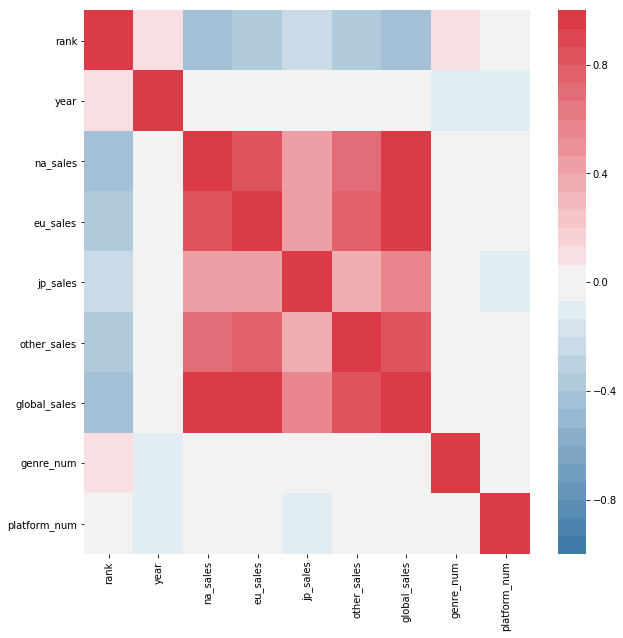

In [30]:
# Now I want to make a heatmap of correlations between the variables to see what I can find out.

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(vgsales.corr(), cmap=sns.diverging_palette(240, 10, n=30), vmin=-1, vmax=1, ax=ax)

From the above heatmap, I see no strong correlations between platform, genre, and sales.

In [31]:
# Now I want to find out the mean sales for the genres and platforms.

vgsales.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'global_sales'].mean().sort_values('global_sales', ascending=False)

,na_sales,eu_sales,jp_sales,global_sales
genre,,,,
Shooter,0.429211,0.256415,0.020053,0.793269
Platform,0.356413,0.194875,0.075166,0.684695
Sports,0.297676,0.171053,0.037547,0.570338
Role-Playing,0.214223,0.119064,0.179722,0.552390
Racing,0.259763,0.185502,0.026326,0.538778
Action,0.247664,0.155708,0.042706,0.504883
Fighting,0.251415,0.118154,0.069169,0.488846
Misc,0.232931,0.125211,0.052875,0.456716
Simulation,0.212111,0.134788,0.051763,0.436744


Here I can see something pretty interesting. Globally, shooter games are the most popular genre. This is true for North America and Europe as well. However, in Japan, shooter games are actually the least popular, while the most popular genre is role-playing games.

From this cursory look at the data, I can draw a few tentative conclusions. Role-playing games are the 5th-least popular in North America and Europe. Consequently, it might be a good idea for makers of role-playing games to focus their marketing efforts in Japan. Meanwhile, makers of shooter games should not focus their marketing in Japan, but should focus on North America and Europe.

In [32]:
vgsales.groupby('platform_num')['na_sales', 'eu_sales', 'jp_sales', 'global_sales'].mean().sort_values('global_sales', ascending=False)

,na_sales,eu_sales,jp_sales,global_sales
platform_num,,,,
4,0.371955,0.199326,0.055954,0.687037
2,0.277808,0.208246,0.061778,0.641988
3,0.378336,0.168193,0.006147,0.599166
6,0.239364,0.069182,0.051894,0.370894
1,0.152862,0.080727,0.081697,0.341347
5,0.069467,0.131141,0.000087,0.226935


Just as a reminder, here is the platform_num legend:

* 1 = Handheld
* 2 = PlayStation Console
* 3 = XBox Console
* 4 = Wii
* 5 = PC
* 6 = Other (Extinct) Console

As we can see, Wii, Playstation, and XBox are the most popular platforms globally by a rather large margin. This does not come as a surprise to me, as someone who plays video games. What does surprise me, however, is that the global sales of the extinct consoles are larger than handheld and PC sales (for reference, these extinct consoles are the Nintendo N64, Nintendo GameCube, and Sega DreamCast). Even though these consoles are now extinct, we can still draw some conclusions from them, because they are "put a disc in, sit in front of the TV with a controller" consoles, as opposed to handheld or PC games. It also may be relevant that two of the three extinct consoles are made by Nintendo. Perhaps I will have to explore that connection more.

Now let's look at the market breakdown. In North America, platform sales closely match the global sales in terms of order of popularity. Xbox is the most popular, with Wii trailing closely behind, then PlayStation. Europe is similar; however, PC games are more popular than handheld and extinct consoles, and handheld is more popular than the extinct consoles.

Japan's breakdown is quite different from the others. PC games are the least popular by a much greater margin, and XBox is actually the second-least popular by a pretty big amount as well. Handheld games are the most popular in Japan, then PlayStation. Wii and the extinct consoles are in the middle. These sales may be explained by the fact that Sony (the makers of PlayStation) and Nintendo are both Japanese companies, so it would make sense that Japanese platforms are more popular in Japan.

### Conclusion

Overall, this first look at my data has led me to some interesting findings. I was able to get a good idea of sales globally, and in each market, for every genre and platform category. I am excited to build some models and see what kind of new predictions I can make from this data.